In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
from PIL import Image
import itertools
from IPython.display import display

Main reference https://pytorch.org/

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
bird_image = Image.open("D:\School\Applied ML FSU\Applied-ML-FSU\Data/bird038.png").convert("L")
tensor = torchvision.transforms.ToTensor()
bird_tensor = tensor(bird_image)
bird = bird_tensor.flatten()
bscaler = StandardScaler(with_std = False)
sbird = bscaler.fit_transform(bird.reshape(-1,1))
sbird = torch.tensor(sbird).squeeze().float().to(device)

height, width = bird_tensor.squeeze().shape
coordinates = torch.tensor(list(itertools.product(range(height), range(width))))
cscaler = StandardScaler()
scoordinates = cscaler.fit_transform(coordinates)
scoordinates = torch.tensor(scoordinates).float().to(device)

bird_coordinate = list(zip(scoordinates, sbird))
dataloader = torch.utils.data.DataLoader(bird_coordinate, batch_size = 64, shuffle = True)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\evans\AppData\Local\Temp\ipykernel_44028\618277442.py:1: SyntaxWarning: invalid escape sequence '\S'
  bird_image = Image.open("D:\School\Applied ML FSU\Applied-ML-FSU\Data/bird038.png").convert("L")


# (a)

In [4]:
#https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
epochs = 300

In [6]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.1)
mse = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
for epoch in range(epochs):
    for _, (X,y) in enumerate(dataloader):
        optimizer.zero_grad()
        pred = neural_net(X).squeeze()
        loss = mse(pred, y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

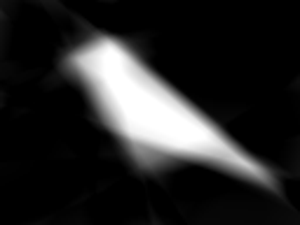

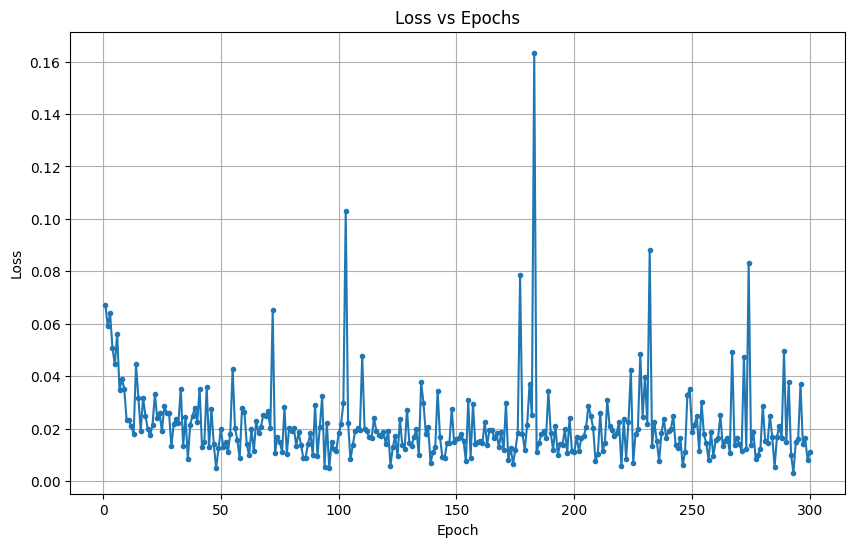

In [7]:
# https://cloudxlab.com/assessment/displayslide/5658/converting-tensor-to-image
with torch.no_grad():
    L = neural_net(scoordinates).cpu()
    L =  np.clip(bscaler.inverse_transform(L), 0, 1)
    L =  (L*255).astype(np.uint8)
    reconstructed = Image.fromarray(L.reshape(height, width))
    resized = reconstructed.resize((300,225))
display(resized)
plt.figure(figsize = (10,6))
plt.plot(range(1, epochs + 1), losses, marker = '.')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# (b)

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [9]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.1)
mse = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
for epoch in range(epochs):
    for _, (X,y) in enumerate(dataloader):
        optimizer.zero_grad()
        pred = neural_net(X).squeeze()
        loss = mse(pred, y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

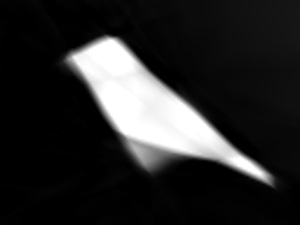

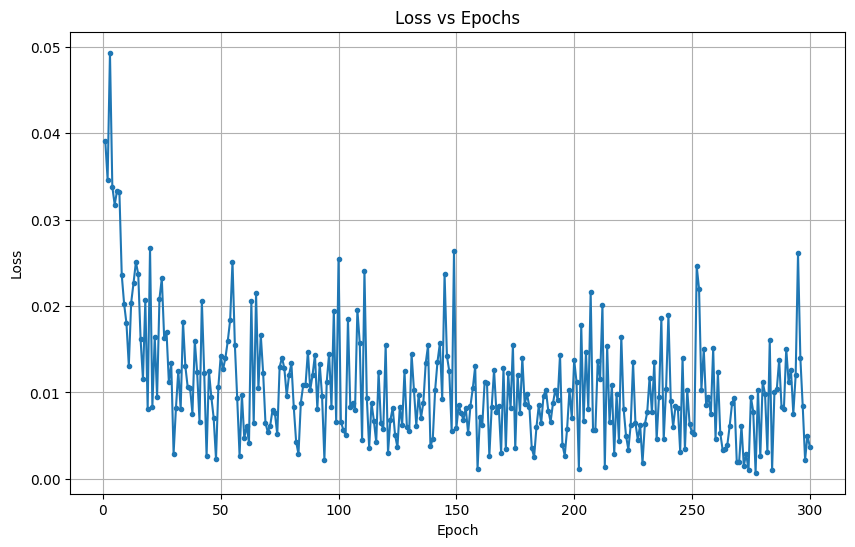

In [10]:
with torch.no_grad():
    L = neural_net(scoordinates).cpu()
    L =  np.clip(bscaler.inverse_transform(L), 0, 1)
    L =  (L*255).astype(np.uint8)
    reconstructed = Image.fromarray(L.reshape(height, width))
    resized = reconstructed.resize((300,225))
display(resized)
plt.figure(figsize = (10,6))
plt.plot(range(1, epochs + 1), losses, marker = '.')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# (c)

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [12]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.1)
mse = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
for epoch in range(epochs):
    for _, (X,y) in enumerate(dataloader):
        optimizer.zero_grad()
        pred = neural_net(X).squeeze()
        loss = mse(pred, y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

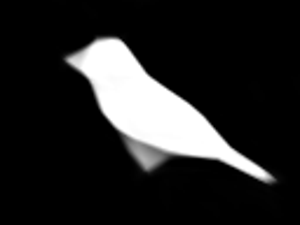

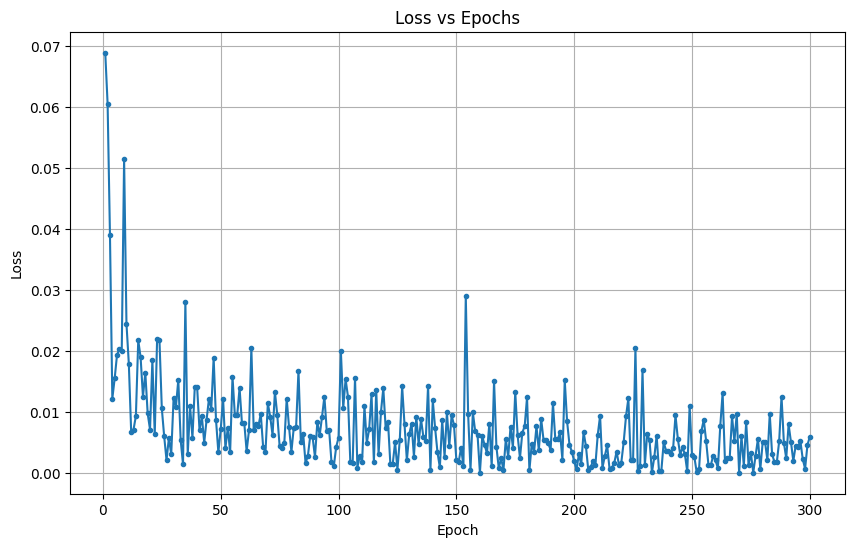

In [13]:
with torch.no_grad():
    L = neural_net(scoordinates).cpu()
    L = np.clip(bscaler.inverse_transform(L), 0, 1)
    L =  (L*255).astype(np.uint8)
    reconstructed = Image.fromarray(L.reshape(height, width))
    resized = reconstructed.resize((300,225))
display(resized)
plt.figure(figsize = (10,6))
plt.plot(range(1, epochs + 1), losses, marker = '.')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# (d)

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
neural_net = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(neural_net.parameters(), lr = 0.1)
mse = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.5)

losses = []
for epoch in range(epochs):
    for _, (X,y) in enumerate(dataloader):
        optimizer.zero_grad()
        pred = neural_net(X).squeeze()
        loss = mse(pred, y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

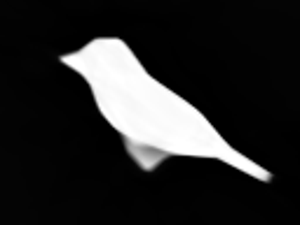

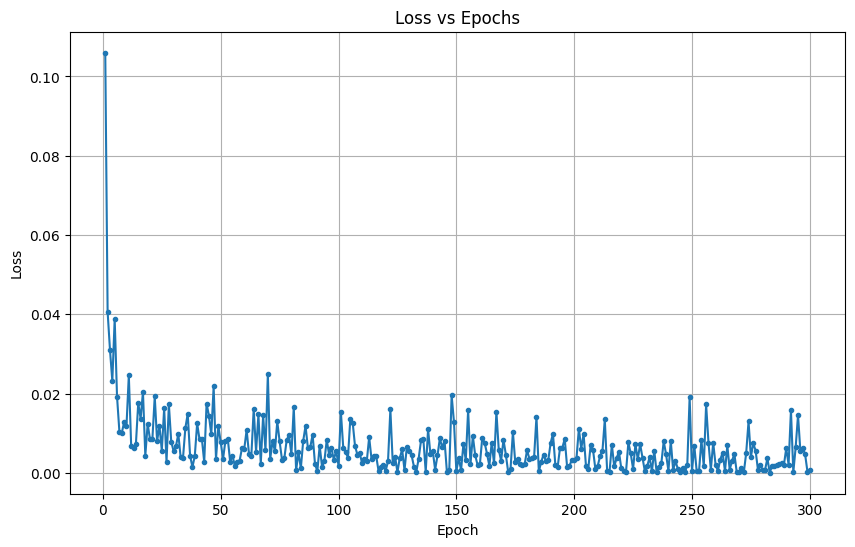

In [16]:
with torch.no_grad():
    L = neural_net(scoordinates).cpu()
    L =  np.clip(bscaler.inverse_transform(L), 0, 1)
    L =  (L*255).astype(np.uint8)
    reconstructed = Image.fromarray(L.reshape(height, width))
    resized = reconstructed.resize((300,225))
display(resized)

plt.figure(figsize = (10,6))
plt.plot(range(1, epochs + 1), losses, marker = '.')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()